In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import yfinance as yf
import sys
from datetime import datetime
import parquet
sys.path.append('../data_func')

from data_helper_functions import create_study_periods_parallel

In [2]:
def load_data(path,  start):
    # Check the file extension to decide the reading method
    if path.endswith('.parquet'):
        df = pd.read_parquet(path)
    elif path.endswith('.csv'):
        df = pd.read_csv(path)
    else:
        raise ValueError("Unsupported file format")

    # Proceed with your data processing...
    df['date'] = pd.to_datetime(df['date'])
    # Filter based on the start date and features...
    df = df[df['date'] >= start]

    # Assuming start_date and end_date are defined somewhere...
    start_date = df['date'].min()
    end_date = df['date'].max()

    return df, start_date, end_date

In [3]:
# path='../data/modern_stock_data.csv'
path='../data/wq_alphas_modern.csv'
# path='../expanded_stock_w_autoenconders.parquet'
start=datetime(2000,1,1)
df,start_date,end_date=load_data(path,start)
# df = df[df['TICKER'].isin(['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW'])]
target='cross_sectional_median'

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,date,TICKER,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,S_DQ_PCTCHANGE,S_DQ_AMOUNT,vwap,alpha001,alpha017,alpha023,alpha030,alpha034
0,0,0,2016-02-01,ORCL,35.90,36.5400,35.85,36.32,14143998.0,0.000275,5.137100e+08,36.32,NaN,NaN,0.0,NaN,NaN
1,967,1,2016-02-02,ORCL,35.85,35.9400,35.25,35.35,17404484.0,-0.026707,6.152485e+08,35.35,NaN,NaN,0.0,NaN,NaN
2,1333,2,2016-02-03,ORCL,35.56,35.7900,34.94,35.69,13855330.0,0.009618,4.944967e+08,35.69,NaN,NaN,0.0,NaN,NaN
3,1977,3,2016-02-04,ORCL,35.70,36.5400,35.66,36.45,16925925.0,0.021295,6.169500e+08,36.45,NaN,NaN,0.0,NaN,0.254545
4,2510,4,2016-02-05,ORCL,36.13,36.2400,35.37,35.70,17312179.0,-0.020576,6.180448e+08,35.70,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001296,1000835,659913,2023-12-22,CCJ,43.89,44.4898,43.55,43.62,4003136.0,-0.000458,1.746168e+08,43.62,NaN,NaN,0.0,NaN,NaN
1001297,1001090,659914,2023-12-26,CCJ,43.90,44.0200,43.28,43.89,2287501.0,0.006190,1.003984e+08,43.89,NaN,NaN,0.0,NaN,NaN
1001298,1001488,659915,2023-12-27,CCJ,43.84,44.2500,43.57,43.62,2193267.0,-0.006152,9.567031e+07,43.62,NaN,NaN,0.0,NaN,NaN
1001299,1002067,659916,2023-12-28,CCJ,43.30,43.5400,42.83,42.90,3993260.0,-0.016506,1.713109e+08,42.90,NaN,NaN,0.0,NaN,NaN


In [5]:
df=df.dropna()

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,date,TICKER,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,S_DQ_PCTCHANGE,S_DQ_AMOUNT,vwap,alpha001,alpha017,alpha023,alpha030,alpha034
28,14552,28,2016-03-11,ORCL,38.45,38.9700,38.28,38.95,13143306.0,0.023653,5.119318e+08,38.95,0.828854,-0.357333,-0.3600,0.125189,0.080808
29,14878,29,2016-03-14,ORCL,38.91,38.9400,38.55,38.70,14704491.0,-0.006418,5.690638e+08,38.70,0.560598,-0.015712,-0.1700,0.239513,0.354040
30,15238,30,2016-03-15,ORCL,38.35,38.8700,38.13,38.74,17502867.0,0.001034,6.780611e+08,38.74,0.381339,-0.505581,0.1000,0.138552,0.451010
31,16080,31,2016-03-16,ORCL,39.55,40.9450,39.53,40.22,49082261.0,0.038203,1.974089e+09,40.22,0.828854,-0.306832,-2.0050,0.171859,0.175253
32,16400,32,2016-03-17,ORCL,40.15,40.9600,40.07,40.61,22163514.0,0.009697,9.000603e+08,40.61,0.828854,-0.244297,-2.0900,0.032823,0.253535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001276,1000842,136147,2023-12-22,ARES,115.75,116.8100,115.53,115.80,415412.0,0.005383,4.810471e+07,115.80,0.078947,-0.012077,0.6900,0.045220,0.965517
1001277,1001069,136148,2023-12-26,ARES,116.20,118.4000,115.47,118.31,579388.0,0.021675,6.854739e+07,118.31,0.763158,-0.419427,-2.6020,0.043622,0.344828
1001278,1001470,136149,2023-12-27,ARES,118.54,119.1100,117.96,119.03,384643.0,0.006086,4.578406e+07,119.03,0.763158,-0.053140,-2.3000,0.036428,0.793103
1001279,1002028,136150,2023-12-28,ARES,120.18,120.9900,118.80,119.88,449836.0,0.007141,5.392634e+07,119.88,0.763158,-0.296066,-2.5900,0.030589,0.896552


In [7]:
features=[col for col in df.columns if col.startswith('alpha')]
features.append('RET')
# features = [col for col in df.columns if col not in ['date', 'TICKER',"S_DQ_CLOSE"]]

# features = [col for col in df.columns if col not in ['date', 'TICKER',"RET"]]

In [8]:
df.rename(columns={'S_DQ_PCTCHANGE': 'RET'}, inplace=True)

/var/folders/bm/bm_nkxfx3w1303dr6gyz9cg00000gn/T/ipykernel_83465/1030465175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'S_DQ_PCTCHANGE': 'RET'}, inplace=True)


In [9]:
numeric_df = df.select_dtypes(include=[np.number])

max_values = numeric_df.max()
columns_with_large_values = max_values[max_values >= np.finfo('float32').max].index.tolist()

print("Columns with Excessively Large Values:", columns_with_large_values)

Columns with Excessively Large Values: []


In [10]:
#Optional parameter target_type: 'cross_sectional_median(default)','buckets(10 buckets)','raw_returns'.

study_periods = create_study_periods_parallel(
        df,
        train_size=650,
        val_size=150,
        trade_size=250,
        start_date=start_date,
        end_date=end_date,
        target_type='cross_sectional_median',
        standardize=True,
        data_type='RET',
        features=features)

100%|██████████| 5/5 [00:00<00:00, 15.06it/s]


In [15]:
temp=study_periods[4][1]

In [16]:
temp.sort_values(by=[ 'TICKER','date'])

,Unnamed: 0.1,Unnamed: 0,date,TICKER,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,RET,S_DQ_AMOUNT,vwap,alpha001,alpha017,alpha023,alpha030,alpha034,target
730052,830612,759801,2022-08-19,A,139.35001,139.73000,137.25999,137.62000,1477480.0,-0.669504,2.033308e+08,137.62000,-0.497473,0.762348,0.032380,2.512606,1.637184,0
730053,831299,759802,2022-08-22,A,135.30000,136.03000,133.56000,133.94000,1250729.0,-1.054706,1.675226e+08,133.94000,-1.050051,0.694456,0.032119,2.466983,1.314593,0
730054,831725,759803,2022-08-23,A,133.11000,134.10500,132.04401,132.64000,1188279.0,-0.395321,1.576133e+08,132.64000,-1.548189,0.710300,0.031657,0.471393,1.219713,0
730055,832586,759804,2022-08-24,A,133.02000,134.53999,132.64999,133.67000,1020493.0,0.280980,1.364093e+08,133.67000,1.148467,0.497475,0.031657,-1.392453,-1.195407,1
730056,832659,759805,2022-08-25,A,135.30000,136.08000,133.99001,136.00999,969054.0,0.658053,1.318010e+08,136.00999,1.148467,0.790889,0.031503,-1.420735,-0.086177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232460,903825,106662,2023-03-20,ZTS,164.00000,165.95000,163.70000,165.82001,2145770.0,0.298128,3.558116e+08,165.82001,-0.524422,-1.718374,0.031657,0.192168,-1.347038,0
232461,904381,106663,2023-03-21,ZTS,166.64999,166.99001,165.14000,166.24001,2453550.0,0.078449,4.078782e+08,166.24001,-1.082161,0.440428,0.031657,0.248858,0.520448,0
232462,904711,106664,2023-03-22,ZTS,165.39000,165.94000,161.32001,161.38000,1475641.0,-1.151287,2.381389e+08,161.38000,-1.558280,0.840707,0.031657,0.222555,0.434150,0
232463,905385,106665,2023-03-23,ZTS,162.00000,165.45000,159.39000,161.24001,3560769.0,-0.053203,5.741384e+08,161.24001,-0.524422,0.623905,0.031657,2.105394,-0.385680,1


In [17]:
temp['date'] = temp['date'].dt.tz_localize(None)

In [18]:
day=temp[temp['date']>=datetime(2005, 1, 6)]

In [19]:
day[day['TICKER']=='A']

,Unnamed: 0.1,Unnamed: 0,date,TICKER,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,RET,S_DQ_AMOUNT,vwap,alpha001,alpha017,alpha023,alpha030,alpha034,target
730052,830612,759801,2022-08-19,A,139.35001,139.73000,137.25999,137.62000,1477480.0,-0.669504,2.033308e+08,137.62000,-0.497473,0.762348,0.032380,2.512606,1.637184,0
730053,831299,759802,2022-08-22,A,135.30000,136.03000,133.56000,133.94000,1250729.0,-1.054706,1.675226e+08,133.94000,-1.050051,0.694456,0.032119,2.466983,1.314593,0
730054,831725,759803,2022-08-23,A,133.11000,134.10500,132.04401,132.64000,1188279.0,-0.395321,1.576133e+08,132.64000,-1.548189,0.710300,0.031657,0.471393,1.219713,0
730055,832586,759804,2022-08-24,A,133.02000,134.53999,132.64999,133.67000,1020493.0,0.280980,1.364093e+08,133.67000,1.148467,0.497475,0.031657,-1.392453,-1.195407,1
730056,832659,759805,2022-08-25,A,135.30000,136.08000,133.99001,136.00999,969054.0,0.658053,1.318010e+08,136.00999,1.148467,0.790889,0.031503,-1.420735,-0.086177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730197,903726,759946,2023-03-20,A,133.14000,135.38000,132.73000,134.53999,1704510.0,0.375703,2.293248e+08,134.53999,-1.548189,-0.027162,0.031657,0.047127,-1.248884,0
730198,904195,759947,2023-03-21,A,135.56000,137.42000,135.21500,137.00999,1392258.0,0.691072,1.907533e+08,137.00999,1.148467,0.801609,0.031657,0.090870,0.303693,1
730199,904523,759948,2023-03-22,A,136.96001,137.53500,133.60001,133.73000,1268528.0,-0.946318,1.696402e+08,133.73000,0.141304,0.836073,0.031657,-0.038594,0.533129,0
730200,905509,759949,2023-03-23,A,134.66000,135.07001,129.37210,131.13000,3297906.0,-0.772201,4.324544e+08,131.13000,-0.497473,-0.978011,0.031657,0.166458,1.438799,0


In [20]:
# features = ['standardized_data' if x == 'RET' else x for x in features]
# features = [col for col in df.columns if col not in ['date', 'TICKER']]
# features=['RET']

In [21]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
from tqdm import tqdm
import numpy as np

# Calculate class weights

# clf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=42)


# reg = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42)


In [22]:
study_periods[0][0]

,Unnamed: 0.1,Unnamed: 0,date,TICKER,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,RET,S_DQ_AMOUNT,vwap,alpha001,alpha017,alpha023,alpha030,alpha034,target
28,14552,28,2016-03-11,ORCL,38.45,38.970,38.28,38.95,13143306.0,1.585146,5.119318e+08,38.95,1.174151,-1.439929,0.033611,0.016959,-1.474212,1
29,14878,29,2016-03-14,ORCL,38.91,38.940,38.55,38.70,14704491.0,-0.486201,5.690638e+08,38.70,0.214260,0.802535,0.033633,1.592044,-0.513865,0
30,15238,30,2016-03-15,ORCL,38.35,38.870,38.13,38.74,17502867.0,0.027107,6.780611e+08,38.74,-0.427180,-2.413061,0.033663,0.201067,-0.173040,1
31,16080,31,2016-03-16,ORCL,39.55,40.945,39.53,40.22,49082261.0,2.587377,1.974089e+09,40.22,1.174151,-1.108436,0.033425,0.659947,-1.142262,1
32,16400,32,2016-03-17,ORCL,40.15,40.960,40.07,40.61,22163514.0,0.623831,9.000603e+08,40.61,1.174151,-0.697942,0.033415,-1.255594,-0.867116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893461,324874,936661,2018-08-22,SHV,110.41,110.420,110.40,110.42,573821.0,-0.037849,6.336131e+07,110.42,1.048096,0.532032,0.033651,-1.415865,1.112339,1
893462,325587,936662,2018-08-23,SHV,110.43,110.430,110.41,110.41,751732.0,-0.050385,8.299873e+07,110.41,-0.025012,0.840128,0.033650,0.071352,0.406102,1
893463,325949,936663,2018-08-24,SHV,110.42,110.440,110.42,110.42,631858.0,-0.037849,6.976976e+07,110.42,-0.591478,-1.050362,0.033650,-0.021875,-1.615891,0
893464,326456,936664,2018-08-27,SHV,110.44,110.440,110.42,110.42,832929.0,-0.044117,9.197202e+07,110.42,-1.042034,0.423769,0.033651,0.995319,0.738234,0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
from tqdm import tqdm

def train_and_evaluate_rf(study_periods, features):
    in_sample_accuracies, out_of_sample_accuracies = [], []
    feature_importance_accumulator = np.zeros(len(features))
    final_metrics = {}
    all_daily_portfolio_returns = pd.Series(dtype=float)

    for train_df,_, test_df in tqdm(study_periods):
        # Shift features by 1 to use day n-1's features for day n's target
        X_train = train_df[features].shift(-1)
        y_train = train_df['target']
        X_test = test_df[features].shift(-1)
        y_test = test_df['target']

        # Since the first row for X will now have NaNs after the shift, we need to drop it
        X_train.dropna(inplace=True)
        X_test.dropna(inplace=True)
        # Aligning y_train and y_test by dropping the first row to match the X after shift
        y_train = y_train.loc[X_train.index]
        y_test = y_test.loc[X_test.index]

        # Initialize and train the RandomForestClassifier
        clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
        clf.fit(X_train, y_train)

        # Predictions
        train_preds = clf.predict(X_train)
        test_preds = clf.predict(X_test)

        # Adjust test_df to include predictions; align indices first
        test_df = test_df.loc[X_test.index]
        test_df['predictions'] = test_preds

        # Calculate strategy returns: long positions as positive, short positions as negative
        test_df['strategy_return'] = test_df.apply(lambda x: x['RET'] if x['predictions'] == 1 else -x['RET'], axis=1)
        daily_portfolio_returns = test_df.groupby('date')['strategy_return'].mean()
        all_daily_portfolio_returns = pd.concat([all_daily_portfolio_returns, daily_portfolio_returns])

        # Calculating accuracies
        train_accuracy = accuracy_score(y_train, train_preds)
        test_accuracy = accuracy_score(y_test, test_preds)
        in_sample_accuracies.append(train_accuracy)
        out_of_sample_accuracies.append(test_accuracy)

        # Accumulating feature importances
        feature_importance_accumulator += clf.feature_importances_

    # Final metrics aggregation and calculation
    avg_feature_importances = feature_importance_accumulator / len(study_periods)
    final_metrics['daily_portfolio_returns'] = all_daily_portfolio_returns
    final_metrics['feature_importances'] = pd.Series(avg_feature_importances, index=features).sort_values(ascending=False)
    final_metrics['avg_train_accuracy'] = np.mean(in_sample_accuracies)
    final_metrics['avg_test_accuracy'] = np.mean(out_of_sample_accuracies)
    final_metrics['confusion_matrix'] = confusion_matrix(y_test, test_preds)
    final_metrics['precision'] = precision_score(y_test, test_preds)
    final_metrics['recall'] = recall_score(y_test, test_preds)
    final_metrics['f1'] = f1_score(y_test, test_preds)
    final_metrics['roc_auc'] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    final_metrics['fpr'] = fpr
    final_metrics['tpr'] = tpr

    return final_metrics



In [24]:
train_df=study_periods[4][0]
train_df

,Unnamed: 0.1,Unnamed: 0,date,TICKER,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,RET,S_DQ_AMOUNT,vwap,alpha001,alpha017,alpha023,alpha030,alpha034,target
1000,503933,1000,2020-01-22,ORCL,55.41000,55.64500,54.600,54.72000,6380481.0,-0.370121,3.491399e+08,54.72000,-0.987338,0.859424,0.031660,1.143720,0.900985,0
1001,504029,1001,2020-01-23,ORCL,54.41000,55.00000,54.280,54.98000,6583173.0,0.164308,3.619429e+08,54.98000,-1.521227,-0.343492,0.031685,-0.233275,-1.247386,1
1002,504596,1002,2020-01-24,ORCL,55.06000,55.19500,53.880,54.07000,6426029.0,-0.660291,3.474554e+08,54.07000,-0.987338,0.832384,0.031692,0.780281,-0.421487,0
1003,505314,1003,2020-01-27,ORCL,53.18000,53.51500,52.630,52.69000,8259053.0,-1.007557,4.351695e+08,52.69000,-1.521227,-0.704532,0.031657,-0.484055,0.609593,0
1004,505484,1004,2020-01-28,ORCL,52.86000,53.68000,52.655,53.46000,8620547.0,0.546104,4.608544e+08,53.46000,-0.987338,-1.007035,0.031657,-0.497914,-1.588780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996973,828336,85807,2022-08-12,META,180.81000,181.45720,178.911,180.50000,21241950.0,0.636879,3.834172e+09,180.50000,1.173771,-0.804787,0.031581,-0.536435,-0.617100,1
996974,828674,85808,2022-08-15,META,178.96001,181.44000,178.200,180.89000,15853255.0,0.064049,2.867695e+09,180.89000,1.173771,0.687901,0.031786,-0.634113,0.630303,1
996975,829345,85809,2022-08-16,META,179.44000,180.99001,177.035,179.47000,21123559.0,-0.323476,3.791045e+09,179.47000,0.176806,0.792983,0.031693,-0.601117,1.680747,0
996976,829746,85810,2022-08-17,META,176.75999,178.14000,174.170,174.85001,20081330.0,-1.016074,3.511221e+09,174.85001,-0.477767,0.747321,0.031914,0.238157,0.498997,0


In [25]:
X_train = train_df[features].shift(-1)
# X_train.dropna(inplace=True)
y_train = train_df['target']

In [26]:
X_train

,alpha001,alpha017,alpha023,alpha030,alpha034,RET
1000,-1.521227,-0.343492,0.031685,-0.233275,-1.247386,0.164308
1001,-0.987338,0.832384,0.031692,0.780281,-0.421487,-0.660291
1002,-1.521227,-0.704532,0.031657,-0.484055,0.609593,-1.007557
1003,-0.987338,-1.007035,0.031657,-0.497914,-1.588780,0.546104
1004,-1.521227,0.839807,0.031657,-0.502038,0.923400,-0.207849
...,...,...,...,...,...,...
996973,1.173771,0.687901,0.031786,-0.634113,0.630303,0.064049
996974,0.176806,0.792983,0.031693,-0.601117,1.680747,-0.323476
996975,-0.477767,0.747321,0.031914,0.238157,0.498997,-1.016074
996976,-1.046741,0.782180,0.032065,0.466560,-0.241941,-0.061681


In [27]:
y_train

1000      0
1001      1
1002      0
1003      0
1004      1
         ..
996973    1
996974    1
996975    0
996976    0
996977    0
Name: target, Length: 322809, dtype: int64

  0%|          | 0/5 [00:00<?, ?it/s]/var/folders/bm/bm_nkxfx3w1303dr6gyz9cg00000gn/T/ipykernel_83465/2160037391.py:50: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_daily_portfolio_returns = pd.concat([all_daily_portfolio_returns, daily_portfolio_returns])
100%|██████████| 5/5 [06:41<00:00, 80.27s/it]


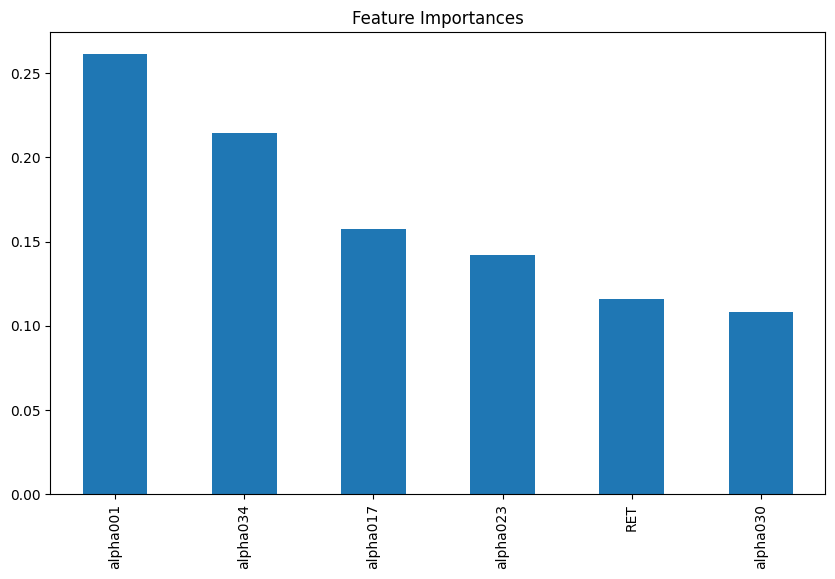

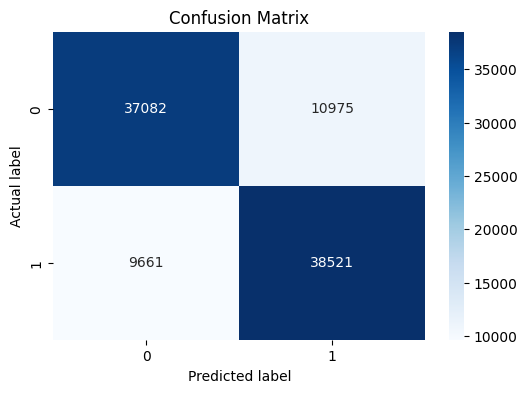

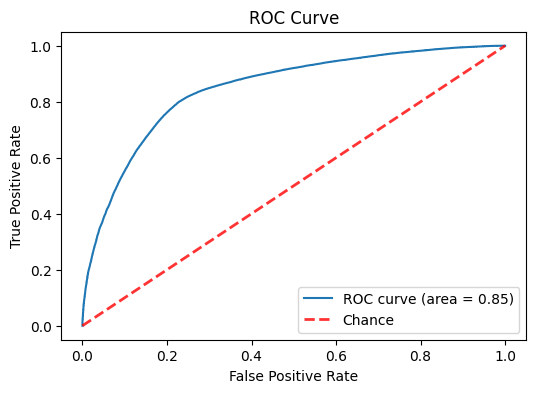

Average Train Accuracy: 0.8841823363569292
Average Test Accuracy: 0.7704151956314956
Precision: 0.7782649102957815
Recall: 0.7994894358889212
F1 Score: 0.7887344130715207


In [28]:
# Assuming 'study_periods' and 'features' are already defined
final_metrics = train_and_evaluate_rf(study_periods, features)

# Feature Importances
plt.figure(figsize=(10, 6))
final_metrics['feature_importances'].plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_metrics['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve and AUC
plt.figure(figsize=(6, 4))
plt.plot(final_metrics['fpr'], final_metrics['tpr'], label=f'ROC curve (area = {final_metrics["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print Accuracy, Precision, Recall, and F1 Score
print(f"Average Train Accuracy: {final_metrics['avg_train_accuracy']}")
print(f"Average Test Accuracy: {final_metrics['avg_test_accuracy']}")
print(f"Precision: {final_metrics['precision']}")
print(f"Recall: {final_metrics['recall']}")
print(f"F1 Score: {final_metrics['f1']}")

In [21]:
# features=["alpha025","alpha033","alpha009","alpha101","alpha010","alpha049","alpha001"]

In [23]:
# Assuming 'study_periods' and 'features' are already defined
final_metrics = train_and_evaluate_rf(study_periods, features)

# Feature Importances
plt.figure(figsize=(10, 6))
final_metrics['feature_importances'].plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_metrics['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve and AUC
plt.figure(figsize=(6, 4))
plt.plot(final_metrics['fpr'], final_metrics['tpr'], label=f'ROC curve (area = {final_metrics["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print Accuracy, Precision, Recall, and F1 Score
print(f"Average Train Accuracy: {final_metrics['avg_train_accuracy']}")
print(f"Average Test Accuracy: {final_metrics['avg_test_accuracy']}")
print(f"Precision: {final_metrics['precision']}")
print(f"Recall: {final_metrics['recall']}")
print(f"F1 Score: {final_metrics['f1']}")

#alpha010,alpha009,alpha001,alpha034,alpha023

  0%|          | 0/14 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [95]:
final_metrics['daily_portfolio_returns']

2003-07-28    0.379448
2003-07-29    0.412640
2003-07-30    0.342283
2003-07-31    0.457298
2003-08-01    0.416875
                ...   
2013-06-25    0.608214
2013-06-26    0.567507
2013-06-27    0.519063
2013-06-28    0.422432
2013-07-01    0.475314
Length: 3250, dtype: float64

In [94]:
import quantstats as qs
qs.reports.html(final_metrics['daily_portfolio_returns'], output='report.html')

/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

In [101]:
df['date'] = pd.to_datetime(df['date'])
subset=df[df['date']>=datetime(2014,1,5)]
subset=subset.dropna()
# Set the index to be a MultiIndex of 'date' and 'TICKER'
multi_df=subset.set_index(['date', 'TICKER'])
prices = multi_df['S_DQ_CLOSE'].unstack(level='TICKER')
# Drop columns (tickers) that have any NaN values
prices = prices.dropna(axis=1, how='any')

# Select the columns that will be used in the analysis
# Here, we're including the return column 'RET' and the alpha factors
multi_df = multi_df[['RET', 'alpha001', 'alpha023', 'alpha034','alpha030','alpha017']]

In [94]:
from alphalens import utils, performance, plotting, tears

# Ensure 'prices' DataFrame is aligned with the dates and assets in 'df'
# 'prices' should be a DataFrame with dates as the index and assets as columns

factor_names = ['alpha001', 'alpha023', 'alpha034','alpha030','alpha017']
for factor in factor_names:
    # Prepare the factor data using Alphalens utility functions
    factor_data = utils.get_clean_factor_and_forward_returns(
        factor=multi_df[factor],
        prices=prices,
        periods=(1, 5, 10),
    )

    # Create a summary tear sheet for each factor
    print(f"Factor Analysis for {factor}")
    tears.create_summary_tear_sheet(factor_data)

/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/alphalens/utils.py:288: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)


IndexError: invalid index to scalar variable.

In [ ]:
# # Creating separate DataFrames for in-sample and out-of-sample portfolios
# in_sample_long_portfolios = pd.DataFrame()
# out_of_sample_long_portfolios = pd.DataFrame()

# in_sample_short_portfolios = pd.DataFrame()
# out_of_sample_short_portfolios = pd.DataFrame()

# # Assuming study_periods contains the train-test split dataframes
# for train_df, test_df in tqdm(study_periods):
#     X_train = train_df[['standardized_return']]
#     y_train = train_df['target']

#     X_test = test_df[['standardized_return']]
#     y_test = test_df['target']
#     # class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#     # class_weights_dict = {0: class_weights[0], 1: class_weights[1] * 5}  # Increase the weight for class 1 as needed

#     # clf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=42, class_weight=class_weights_dict)

#     # Train the classifier
#     # clf.fit(X_train, y_train)
#     reg.fit(X_train, y_train)
#     # Predict on both train and test data
#     # train_probs = clf.predict_proba(X_train)[:, 1]
#     # test_probs = clf.predict_proba(X_test)[:, 1]
#     train_preds = reg.predict(X_train)
#     test_preds = reg.predict(X_test)


#     # Assign predicted probabilities back to train and test dataframes
#     # train_df['predicted_prob'] = train_probs
#     # test_df['predicted_prob'] = test_probs
#     train_df['predicted_prob'] = train_preds
#     test_df['predicted_prob'] = test_preds

#     k = 10

#     # Iterate over unique dates in train_df for in-sample data
#     for date in train_df['date'].unique():
#         date_data = train_df[train_df['date'] == date]
#         sorted_data = date_data.sort_values(by='predicted_prob', ascending=False)

#         long_tickers = sorted_data.head(k)[['date', 'TICKER', 'predicted_prob']]
#         short_tickers = sorted_data.tail(k)[['date', 'TICKER', 'predicted_prob']]

#         in_sample_long_portfolios = pd.concat([in_sample_long_portfolios, long_tickers])
#         in_sample_short_portfolios = pd.concat([in_sample_short_portfolios, short_tickers])

#     # Iterate over unique dates in test_df for out-of-sample data
#     for date in test_df['date'].unique():
#         date_data = test_df[test_df['date'] == date]
#         sorted_data = date_data.sort_values(by='predicted_prob', ascending=False)

#         long_tickers = sorted_data.head(k)[['date', 'TICKER', 'predicted_prob']]
#         short_tickers = sorted_data.tail(k)[['date', 'TICKER', 'predicted_prob']]

#         out_of_sample_long_portfolios = pd.concat([out_of_sample_long_portfolios, long_tickers])
#         out_of_sample_short_portfolios = pd.concat([out_of_sample_short_portfolios, short_tickers])
